<a href="https://colab.research.google.com/github/KuvinaDesch/MAT421/blob/main/ModH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Another important concept would be differential equations.  Essentially, you often don't know an exact function for something, but you do have a function for the rate of change of that.  If it's mathematically defined, you can integrate or use a different technique to determine the original function.  If it's not mathematically defined, you can approximately find the original function with an iterative method.

A differential equation is one that tells you the nth derivative of f(x) in terms of x, f(x), f'(x), f''(x), and so on (but only up tp the n-1th derivative).  This is called an nth order ordinary differential equation (ODE).  There are also partial derivatives.  They give you the partial derivative of a function with multiple inputs.

A general solution is one that satisfies just the differential equation.  There are usually infinitely many of these.  A particular solution is one that satisfies the differential equation and also passes through some particular value at a given point.  With a first order ODE, there is usually only 1 particular solution.  When you're given a differential equation and some specific value of the function, it is called an initial value problem.

Anything more than a first order ODE is hard to deal with.  In fact, it's so hard to deal with that we often want to change it to a linear system of first order differential equations.  Usually, you would have multiple variables, who each change according to their own values and other variables' values.  With a linear system though, the multiple variables are just the function, its derivative, 2nd derivative, and so on.  Since all the derivatives are with respect to the same variable, the system is still made up of ODEs.  This time, the initial state can be given as a vector of the values of f(t), f'(t), f''(t), and so on.  These are also the values of any state vector.  If these are the only things the various derivatives depend on, and if they depend linearly upon these, then you can arrange the coefficients in a matrix and do vector matrix multiplication.

This does also work with multiple variables, as long as their derivatives are with respect to the same independent variable.  For example, consider x'(t) = 2x(t) + 3y(t), and y'(t) = x(t) - y(t).  These 2 equations can be combined into one.  [x'(t), y'(t)] =  
[2, 3  
1, -1]*[x(t), y(t)]

So one way to solve initial value problems is called Euler's method.  Here's how it works.  So a derivative is just the slope of the tangent line at some particular function value.  When you're close to that value, the function and the tangent line are approximately the same.  You may not know the complete function, but if you know the value at 1 point, you can make predictions about values at nearby points by calculating the derivative and using that to form a tangent line.  You can't follow the tangent line forever, because by the time you move far enough away, the slope will have changed, and you need a new tangent line.  Euler's method uses small steps to follow then tangent line and then adjust for the new derivative.

If S'(t) = F(t, S(t)), then F(t, S(t)) is the slope.  Slope means how much the output (S) changes for 1 unit change in input (t).  We're changing t by a small value h, so S should change by h*F  This is added to the value you used to find the slope to get the new value.  In other words, we divide t into a numerical grid, with even spacing of h.  For each value t_i, we use Euler's method to find S(t_i).  We do that with the following equation:  S(t_(i+1)) = S(t_i) + hF(t_i, S(t_i))

Let's try that in python.

[ 8.          8.8         9.68       10.648      11.7128     12.88408
 14.172488   15.5897368  17.14871048 18.86358153 20.74993968 22.82493365
 25.10742701 27.61816972 30.37998669 33.41798536]


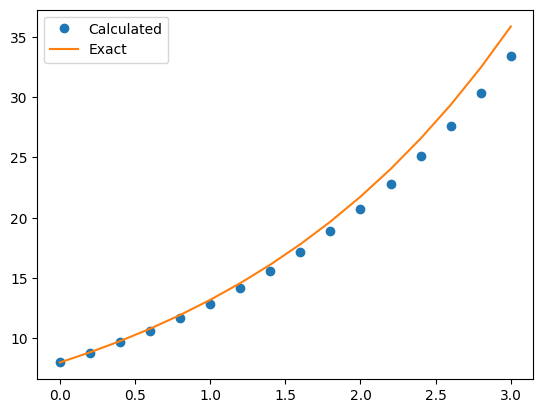

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# define the derivative function
# it is y' = 0.5y
# The initial value is y(0) = 8
def d(t, y):
  return 0.5*y

y0 = 8 # initial condition
h = 0.2 # step size
start = 0
end = 3
t = np.arange(start, end+h, h) # all the t values
y = np.zeros(len(t)) # y values, we fill it in 1 by 1

y[0] = y0 # input initial value
# Use Euler's method to calculate each y value
for i in range(len(t)-1):
  y[i+1] = y[i] + h*d(t[i], y[i])

print(y)

# We can see Euler's method slightly underestimates y.  That's because the
# tangent line doesn't rise as fast as the actual slope going forward.
plt.plot(t, y, 'o')
plt.plot(t, 8*np.exp(0.5*t))
plt.legend(["Calculated", "Exact"])

[ 8.          8.2         8.405       8.615125    8.83050312  9.0512657
  9.27754735  9.50948603  9.74722318  9.99090376 10.24067635 10.49669326
 10.75911059 11.02808836 11.30379057 11.58638533 11.87604497 12.17294609
 12.47726974 12.78920149 13.10893152 13.43665481 13.77257118 14.11688546
 14.4698076  14.83155279 15.20234161 15.58240015 15.97196015 16.37125915
 16.78054063 17.20005415 17.6300555  18.07080689 18.52257706 18.98564149
 19.46028253 19.94678959 20.44545933 20.95659581 21.48051071 22.01752347
 22.56796156 23.1321606  23.71046462 24.30322623 24.91080689 25.53357706
 26.17191649 26.8262144  27.49686976 28.1842915  28.88889879 29.61112126
 30.35139929 31.11018427 31.88793888 32.68513735 33.50226579 34.33982243
 35.19831799]


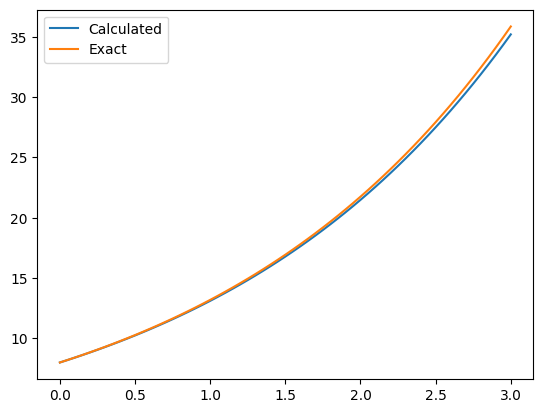

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# define the derivative function
# it is y' = 0.5y
# The initial value is y(0) = 8
def d(t, y):
  return 0.5*y

y0 = 8 # initial condition
h = 0.05 # step size
start = 0
end = 3
t = np.arange(start, end+h, h) # all the t values
y = np.zeros(len(t)) # y values, we fill it in 1 by 1

y[0] = y0 # input initial value
# Use Euler's method to calculate each y value
for i in range(len(t)-1):
  y[i+1] = y[i] + h*d(t[i], y[i])

print(y)

# With smaller h, it is better, but still not exact.
plt.plot(t, y)
plt.plot(t, 8*np.exp(0.5*t))
plt.legend(["Calculated", "Exact"])